<a href="https://colab.research.google.com/github/jialinli-21/Li_DSPN_S25/blob/main/Exercise11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 11: The beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


1. data plotting and train/test sets 2/2
2. knn 3/3
3. for loop 3/3
4. standardizing predictors 2/2


## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [ ]:
install.packages("class")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(class)
library(ggplot2)
library(tidyverse)

In [ ]:
# head(diamonds)
# max(data$price)
data <- diamonds %>%
  mutate(price_bin = ifelse(price > mean(price),1,0)) %>%
  select(carat, depth, table, x,y, price_bin)
head(data)
print(dim(data))

carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.23,61.5,55,3.95,3.98,0
0.21,59.8,61,3.89,3.84,0
0.23,56.9,65,4.05,4.07,0
0.29,62.4,58,4.20,4.23,0
0.31,63.3,58,4.34,4.35,0
0.24,62.8,57,3.94,3.96,0


[1] 53940     6


### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price.

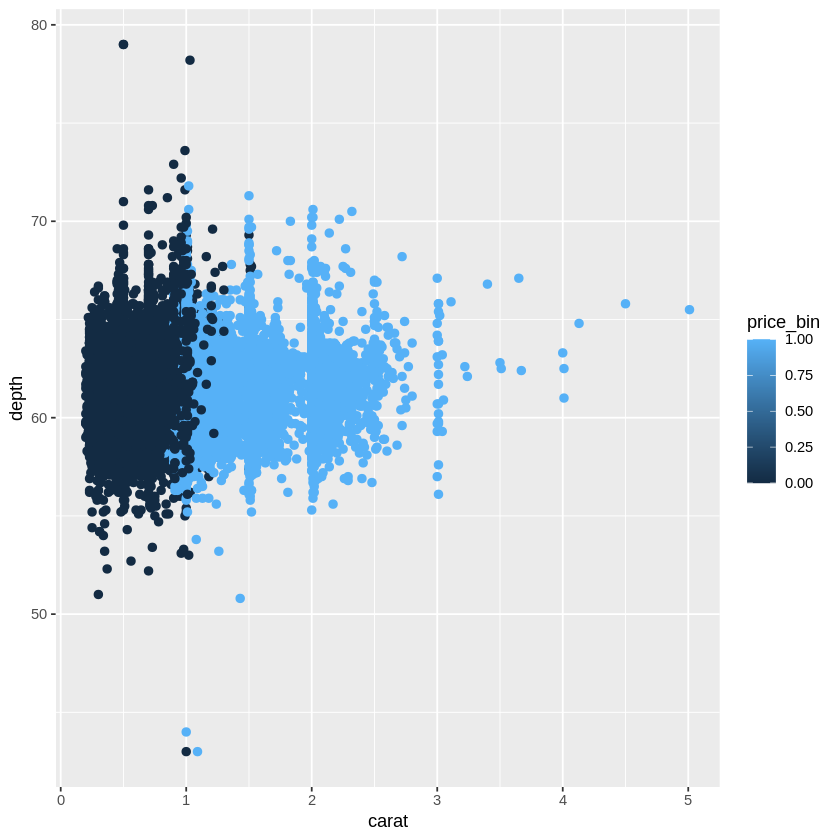

In [ ]:
ggplot(data,aes(x=carat,y=depth,col=price_bin)) +
 geom_point(size=2)


Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict diabetes diagnosis? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?
> *kNN will perform well by only using two predictors because there is an obvious boundary for a binary outcome in the figure. I also think carat gives more information since the color seems to change after 1 carat and there is almost no dark blue dots after that.*


### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [ ]:
set.seed(2023)

#pull random sample of 30
test.inds <- sample(1:nrow(data),round(0.3*nrow(data)))
# TRUE/FALSE indicator for whether each observation is a test item or not.
data$is.test <- 1:nrow(data) %in% test.inds

test_set <- data %>%
    filter(data$is.test == TRUE)

train_set <- data %>%
    filter(data$is.test == FALSE)

head(test_set)
head(train_set)
print(dim(test_set))
print(dim(train_set))

carat,depth,table,x,y,price_bin,is.test
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0.21,59.8,61,3.89,3.84,0,TRUE
0.30,64.0,55,4.25,4.28,0,TRUE
0.30,62.0,54,4.31,4.34,0,TRUE
0.30,63.4,54,4.23,4.29,0,TRUE
0.30,62.7,59,4.21,4.27,0,TRUE
0.23,63.8,55,3.85,3.92,0,TRUE


carat,depth,table,x,y,price_bin,is.test
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0.23,61.5,55,3.95,3.98,0,FALSE
0.23,56.9,65,4.05,4.07,0,FALSE
0.29,62.4,58,4.20,4.23,0,FALSE
0.31,63.3,58,4.34,4.35,0,FALSE
0.24,62.8,57,3.94,3.96,0,FALSE
0.24,62.3,57,3.95,3.98,0,FALSE


[1] 16182     7
[1] 37758     7


## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`.

*Hint: Review the format required for the arguments of knn()*

In [ ]:
set.seed(2023)

#training data pulls the "not test" rows
train.preds <- cbind(train_set$carat, train_set$depth)
train.price <- train_set$price_bin
#testing data pulls the test rows
test.preds <- cbind(test_set$carat, test_set$depth)

#run knn
test.price.knn <- knn(train.preds, test.preds, train.price, k = 3)


Now, output a confusion matrix and calculate the test error to evaluate model performance.

In [ ]:
confusion_df <- data.frame(predicted = test.price.knn,actual = test_set$price_bin)
table(confusion_df)
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))


         actual
predicted    0    1
        0 9697  319
        1  549 5617

[1] "Accuracy: 0.946360153256705"


How did your model perform?
> *My model fits the data well because the prediction accuracy is 94.63%.*


Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [ ]:
set.seed(2023)
#training data pulls the "not test" rows
train.preds <- cbind(train_set$carat, train_set$depth, train_set$x, train_set$y, train_set$table)
train.price <- train_set$price_bin
#testing data pulls the test rows
test.preds <- cbind(test_set$carat, test_set$depth, test_set$x, test_set$y, test_set$table)

#run knn
test.price.knn1 <- knn(train.preds, test.preds, train.spec, k = 3)


In [ ]:
confusion_df <- data.frame(predicted = test.price.knn1,actual = test_set$price_bin)
table(confusion_df)
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted    0    1
        0 9730  392
        1  516 5544

[1] "Accuracy: 0.943888270918304"


Did your model predictions improve?
> *The prediction accuracy decreased after introducing more predictors, so the model fits the data worse than before.*


# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy.

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`.

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [ ]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

,k,error
,<int>,<lgl>
1,1,NA
2,2,NA
3,3,NA
4,4,NA
5,5,NA
6,6,NA


In [ ]:
for (k in seq(1:30)) {
    #training data pulls the "not test" rows

    train.preds <- cbind(train_set$carat, train_set$depth)
    train.price <- train_set$price_bin
    #testing data pulls the test rows
    test.preds <- cbind(test_set$carat, test_set$depth)
    knn_fits  <- knn(train.preds, test.preds, train.price, k = k)

    #overall error
    conf_df  <- data.frame(predicted = knn_fits, actual = test_set$price_bin) # data frame of test predictions versus actual test
    output$error[k]  <- 1- mean(conf_df$predicted == conf_df$actual)#calculate error from conf_df and add to your output dataframe

}
head(output)

,k,error
,<int>,<dbl>
1,1,0.05320727
2,2,0.05370164
3,3,0.05363985
4,4,0.05370164
5,5,0.05271289
6,6,0.05258930


Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


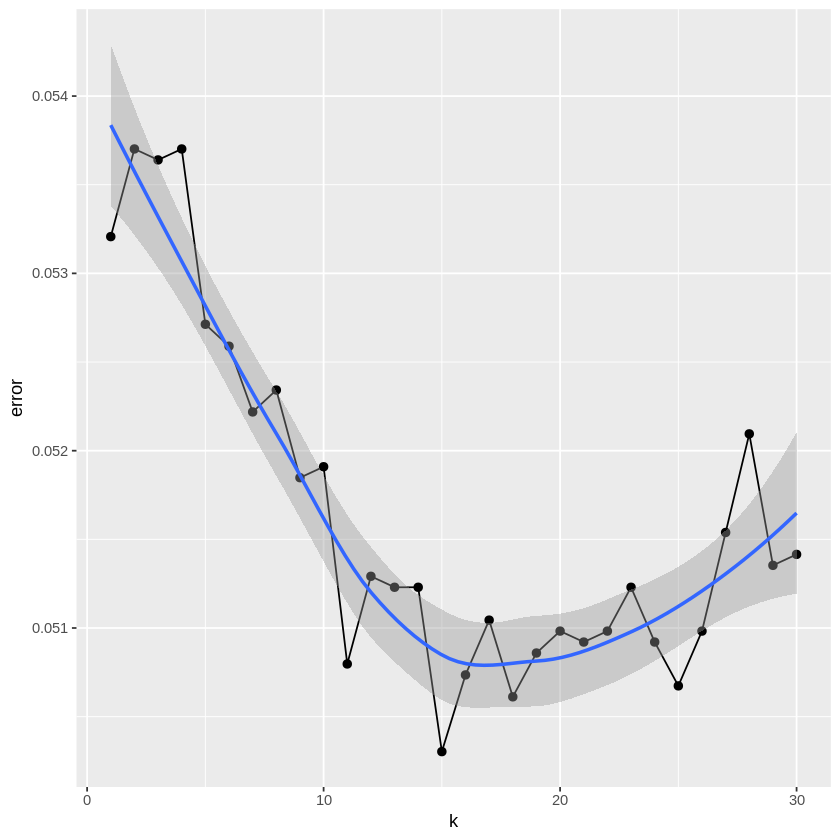

In [ ]:
ggplot(output,aes(x=k,y=error)) +
 geom_point(size=2)+
 geom_line() +
 geom_smooth()

Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> *I think the optimal k is 17 because the trend of error rate started to increase after 17.*


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [ ]:
set.seed(2023)

#training data pulls the "not test" rows
train.preds <- cbind(scale(train_set$carat), scale(train_set$depth))
train.price <- train_set$price_bin
#testing data pulls the test rows
test.preds <- cbind(scale(test_set$carat), scale(test_set$depth))

#run knn
test.price.knn2 <- knn(train.preds, test.preds, train.price, k = 17)

confusion_df <- data.frame(predicted = test.price.knn2,actual = test_set$price_bin)
table(confusion_df)
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted    0    1
        0 9718  292
        1  528 5644

[1] "Accuracy: 0.949326412062786"


What impact did rescaling the data have on your error rate?
> *Rescaling the data improved the prediction accuracy a little.*

**DUE:** 5pm March 19, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*
>
>
